In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import montecarlo
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

# Scenario 1: 2 Headed Coin

In [11]:
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_die_weight('H', 5)

fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(1000)
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.play(1000)

fair = Analyzer(fair_game)
unfair = Analyzer(unfair_game)

fair.jackpot()

,1,2,3
Roll Number,,,
0,H,H,H
6,T,T,T
7,T,T,T
13,H,H,H
15,H,H,H
...,...,...,...
961,H,H,H
966,H,H,H
970,T,T,T


246

In [12]:
unfair.jackpot()

,1,2,3
Roll Number,,,
2,H,H,H
5,H,H,H
9,H,H,H
15,H,H,H
19,H,H,H
...,...,...,...
988,H,H,H
989,H,H,H
990,H,H,H


353

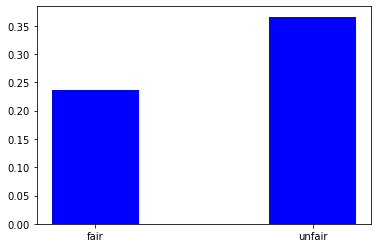

In [13]:
fair_rel_freq = 236/1000
unfair_rel_freq = 366/1000
freqs = [fair_rel_freq, unfair_rel_freq]
names = ['fair', 'unfair']
plt.bar(names, freqs, color='blue', width = 0.4);

# Scenario 2: 6 Sided Die

In [14]:
fair_die = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_die_1.change_die_weight(6, 5)
unfair_die_2.change_die_weight(1, 5)

fair_game_dice = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game_dice.play(10000)
unfair_game_dice = Game([fair_die, fair_die, unfair_die_1, unfair_die_1, unfair_die_2])
unfair_game_dice.play(10000)

fair_analyzer_dice = Analyzer(fair_game_dice)
unfair_analyzer_dice = Analyzer(unfair_game_dice)

fair_analyzer_dice.jackpot()

,1,2,3,4,5
Roll Number,,,,,
789,6,6,6,6,6
1108,6,6,6,6,6
1535,4,4,4,4,4
3301,5,5,5,5,5
3497,3,3,3,3,3
4151,3,3,3,3,3
4488,5,5,5,5,5
5572,5,5,5,5,5
5823,3,3,3,3,3


13

In [15]:
unfair_analyzer_dice.jackpot()

,1,2,3,4,5
Roll Number,,,,,
20,6,6,6,6,6
563,6,6,6,6,6
699,6,6,6,6,6
1117,6,6,6,6,6
1522,1,1,1,1,1
1792,6,6,6,6,6
2460,1,1,1,1,1
2961,1,1,1,1,1
3341,6,6,6,6,6


15

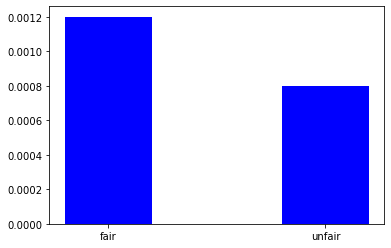

In [16]:
fair_rel_freq2 = 12/10000
unfair_rel_freq2 = 8/10000
freqs2 = [fair_rel_freq2, unfair_rel_freq2]
names2 = ['fair', 'unfair']
plt.bar(names2, freqs2, color='blue', width = 0.4);

In [17]:
fair_analyzer_dice.combo().head(10)

n
0 1 2 3 4     
1 3 4 5 6  160
  2 3 4 5  158
2 3 4 5 6  154
1 2 3 4 6  153
      5 6  142
    4 5 6  139
    2 4 5  100
2 3 4 5 5   97
1 2 2 3 6   93
    3 3 4   91

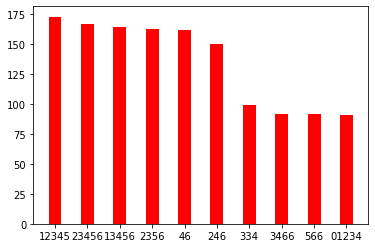

In [18]:
comb_freqs = [173, 167, 164, 163, 162, 150, 99, 92, 92, 91]
combs = ['12345', '23456', '13456', '2356', '46', '246', '334', '3466', '566', '01234']
plt.bar(combs, comb_freqs, color='red', width=0.4);

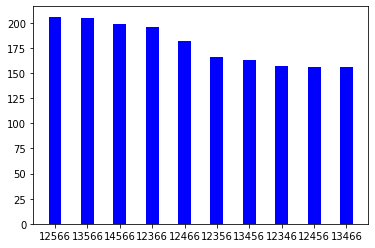

In [19]:
comb_freqs = [206, 205, 199, 196, 182, 166, 163, 157, 156, 156]
combs = ['12566', '13566', '14566', '12366', '12466', '12356', '13456', '12346', '12456', '13466']
plt.bar(combs, comb_freqs, color='blue', width=0.4);

# Scenario 3: Roman Alphabet

In [20]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
letters = Die(np.array(alphabet))
freqs = [8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 1.8121, 2.4705,
 3.0034, 7.5448, 0.1965, 1.1016, 5.4893, 3.0129, 6.6544,
 7.1635, 3.1671, 0.1962, 7.5809, 5.7351, 6.9509, 3.6308,
 1.0074, 1.2899, 0.2902, 1.7779, 0.2722]

for i in range(len(freqs)):
    letters.change_die_weight(alphabet[i], freqs[i])
    
letter_game = Game([letters, letters, letters, letters, letters])
letter_game.play(1000)
df = letter_game.recent_results('Wide').T
print(df)
df

     0  1  2  3  4
0    u  n  t  t  r
1    d  y  e  d  y
2    a  e  a  c  b
3    h  b  e  l  t
4    e  z  n  t  r
..  .. .. .. .. ..
995  g  i  o  n  c
996  i  r  n  t  t
997  e  r  e  v  c
998  o  g  j  n  k
999  e  p  s  z  o

[1000 rows x 5 columns]


,0,1,2,3,4
0,u,n,t,t,r
1,d,y,e,d,y
2,a,e,a,c,b
3,h,b,e,l,t
4,e,z,n,t,r
...,...,...,...,...,...
995,g,i,o,n,c
996,i,r,n,t,t
997,e,r,e,v,c
998,o,g,j,n,k
